In [3]:
#import the functions from figurestyle.py which is outside the folder   
import sys
sys.path.append('..')
from figurestyle import *

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
# import a file with extension .eig
data = np.loadtxt('JJ_array_membranes_fast_HFSSDesign1.eig')
data = data[:,0:2]
data[:,0] = data[:,0] + 1

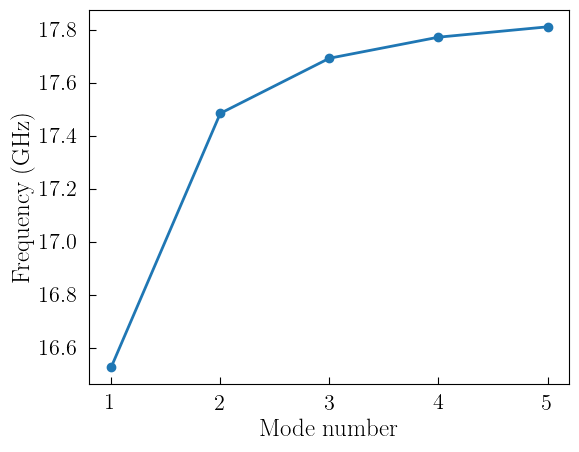

In [7]:
# plot the data
figure_features()
plt.plot(data[:,0], data[:,1], 'o-')
plt.xlabel('Mode number')
plt.ylabel('Frequency (GHz)')
plt.show()

In [8]:
plasma_frequency = 17.9e9 #Hz
Elj = 40e9 #Hz

h = 6.62607015e-34
e = 1.602e-19
phi_0 = h/2/e

junction_inductance = (phi_0/2/np.pi)**2/(Elj*h)
junction_capacitance = 1/(2*np.pi*plasma_frequency)**2/junction_inductance

# 1/(np.sqrt(junction_capacitance*junction_inductance))/2/np.pi

In [9]:
N = 76
Cj = junction_capacitance
f0 = plasma_frequency

def func(x, c0):
    return f0*np.sqrt((1-np.cos(np.pi*x/N))/(c0/2/Cj + 1-np.cos(np.pi*x/N)))

In [10]:
# fitting data with func
popt, pcov = curve_fit(func, data[:,0], data[:,1])

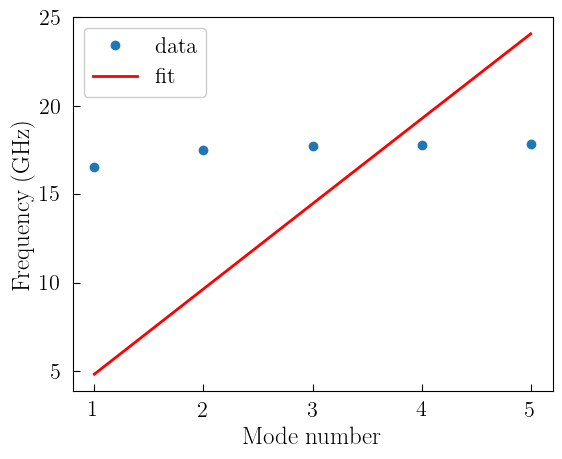

In [11]:
# plot the data and the fit
figure_features()
plt.plot(data[:,0], data[:,1], 'o', label='data')
plt.plot(data[:,0], func(data[:,0], *popt), 'r-', label='fit')
plt.xlabel('Mode number')
plt.ylabel('Frequency (GHz)')
plt.legend()
plt.show()